In [25]:
!pip install tensorflow

     |████████████████████████████████| 207.1 MB 41 kB/s  eta 0:00:01     |███████████████                 | 97.7 MB 5.7 MB/s eta 0:00:20     |███████████████▏                | 98.0 MB 5.7 MB/s eta 0:00:20     |███████████████████             | 122.6 MB 7.5 MB/s eta 0:00:12     |█████████████████████████████▉  | 193.4 MB 4.7 MB/s eta 0:00:03
  Using cached protobuf-3.19.1-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
     |████████████████████████████████| 126 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 974 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 8.4 MB/s eta 0:00:01     |█████████████████████████████▉  | 11.4 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████|

In [1]:
import argparse
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
from sklearn.model_selection import train_test_split

In [4]:
ratings_df = pd.read_csv('data-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'], encoding='latin-1')
ratings_df

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [8]:
X_train, X_val = train_test_split(ratings_df, test_size=0.1)

In [28]:
X_train

,user_id,movie_id,rating,unix_timestamp
11609,192,340,4,881366535
84600,613,530,5,891227262
47756,586,468,3,884066087
11436,279,998,5,875313883
75703,654,121,4,887863757
...,...,...,...,...
96408,821,22,5,874793418
19686,267,450,2,878974128
76671,608,306,4,880402983
20863,472,168,5,892791062


In [23]:
X_val.to_csv('data-100k/X_val', sep='\t', header=False, index=False)
X_train.to_csv('data-100k/X_train', sep='\t', header=False, index=False)


In [26]:
test = pd.read_csv('data-100k/X_train', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'], encoding='latin-1')

In [27]:
test

,user_id,movie_id,rating,unix_timestamp
0,192,340,4,881366535
1,613,530,5,891227262
2,586,468,3,884066087
3,279,998,5,875313883
4,654,121,4,887863757
...,...,...,...,...
89995,821,22,5,874793418
89996,267,450,2,878974128
89997,608,306,4,880402983
89998,472,168,5,892791062


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import random
import math
print('finished importing')

finished importing


In [3]:
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow.compat.v1 as tf

In [4]:
def mask(df, key, function):
  """Returns a filtered dataframe, by applying function to key"""
  return df[function(df[key])]

def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

In [5]:
# from google.colab import drive
# drive.mount('/content/drive/')
# DIR = '/content/drive/MyDrive/Team_34_Algo_Project'
DIR = '.'

In [30]:
df = pd.read_csv(f'data/rating.csv')
df.columns =['user_id', 'movie_id', 'rating', 'unix_timestamp']
# movie_df = pd.read_csv(f'{DIR}/data/movie.csv')

# df = movie_df.merge(ratings_df, on="movieId")
# df.head()
df

,user_id,movie_id,rating,unix_timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [31]:
train, val = train_test_split(df, test_size=0.1)

In [32]:
val

,user_id,movie_id,rating,unix_timestamp
12813562,88559,3527,2.0,2001-03-16 05:02:29
1619795,10936,55290,3.5,2011-07-14 16:24:15
2593526,17571,4874,3.0,2003-04-10 07:42:08
16021506,110847,1377,3.5,2006-01-17 05:38:30
16752444,115870,44199,3.5,2006-07-08 16:22:42
...,...,...,...,...
13558348,93669,5585,0.5,2014-12-22 22:49:44
17255647,119343,5319,4.0,2010-05-05 18:27:35
9047896,62593,1921,4.5,2007-02-12 01:59:44
5372319,36899,2145,4.0,1999-12-21 14:33:33


In [33]:
train.to_csv('data/X_train', sep='\t', header=False, index=False)
val.to_csv('data/X_val', sep='\t', header=False, index=False)

In [34]:
yo = pd.read_csv('data/X_val', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'], encoding='latin-1')

In [35]:
yo

,user_id,movie_id,rating,unix_timestamp
0,88559,3527,2.0,2001-03-16 05:02:29
1,10936,55290,3.5,2011-07-14 16:24:15
2,17571,4874,3.0,2003-04-10 07:42:08
3,110847,1377,3.5,2006-01-17 05:38:30
4,115870,44199,3.5,2006-07-08 16:22:42
...,...,...,...,...
2000022,93669,5585,0.5,2014-12-22 22:49:44
2000023,119343,5319,4.0,2010-05-05 18:27:35
2000024,62593,1921,4.5,2007-02-12 01:59:44
2000025,36899,2145,4.0,1999-12-21 14:33:33


In [4]:
def mask(df, key, function):
  """Returns a filtered dataframe, by applying function to key"""
  return df[function(df[key])]

def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(f'data/rating.csv')

In [6]:
df

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [15]:
!pip install git+https://github.com/altair-viz/altair.git

  Cloning https://github.com/altair-viz/altair.git to /private/var/folders/z_/b3kpy16x01b15dn3t8_zk5zh0000gn/T/pip-req-build-cekafaa0
  Running command git clone -q https://github.com/altair-viz/altair.git /private/var/folders/z_/b3kpy16x01b15dn3t8_zk5zh0000gn/T/pip-req-build-cekafaa0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [17]:
!pip install vega_datasets

     |████████████████████████████████| 210 kB 5.3 MB/s eta 0:00:01


In [19]:
import altair as alt

# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_bar().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

In [23]:
movie_df = pd.read_csv(f'data/movie.csv')

In [24]:
df_with_titles = df.merge(movie_df, on='movieId')

In [25]:
df_with_titles

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
20000258,138301,121017,3.5,2015-01-06 15:34:39,The Gentleman from Epsom (1962),Comedy|Crime
20000259,138301,121019,4.5,2015-01-06 15:36:46,The Great Spy Chase (1964),Action|Comedy|Thriller
20000260,138301,121021,4.5,2015-01-06 15:38:07,Taxi for Tobruk (1961),Drama|War
20000261,138406,110167,4.5,2014-03-30 12:55:27,"Judge and the Assassin, The (Juge et l'assassi...",Crime|Drama


In [ ]:
#rating mean per movie
#rating mean per user
#of ratigns per user

In [22]:
df.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [3]:
ratings_per_user = df

In [4]:
user_group_df = df.groupby(['userId'])
user_group_df

In [5]:
user_rating_counts = df['userId'].value_counts()
user_rating_counts

118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
96335       20
112744      20
96371       20
30803       20
52713       20
Name: userId, Length: 138493, dtype: int64

In [6]:
movie_rating_counts = df['movieId'].value_counts()
movie_rating_counts

296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
105982        1
105978        1
40404         1
112064        1
131136        1
Name: movieId, Length: 26744, dtype: int64

In [229]:
movie_rating_counts.sum()

20000263

In [230]:
movie_counts = pd.DataFrame(movie_rating_counts)
movie_counts.columns=['movie_count']
movie_counts = movie_counts.reset_index()
movie_counts = pd.DataFrame(movie_counts['movie_count'])
movie_counts

,movie_count
0,67310
1,66172
2,63366
3,63299
4,59715
...,...
26739,1
26740,1
26741,1
26742,1


In [231]:
quantile_movies = [movie_counts.quantile(0),
movie_counts.quantile(0.1),
movie_counts.quantile(0.2),
movie_counts.quantile(0.3),
movie_counts.quantile(0.4),
movie_counts.quantile(0.5),
movie_counts.quantile(0.6),
movie_counts.quantile(0.7),
movie_counts.quantile(0.8),
movie_counts.quantile(0.9),
movie_counts.quantile(1)]
quantile_movies = [ x.tolist()[0] for x in quantile_movies]

In [232]:
quantile_movies

[1.0,
 1.0,
 2.0,
 4.0,
 8.0,
 18.0,
 47.0,
 123.0,
 346.0,
 1305.7000000000007,
 67310.0]

In [238]:
quantile_movies[:-1]

[1.0, 1.0, 2.0, 4.0, 8.0, 18.0, 47.0, 123.0, 346.0, 1305.7000000000007]

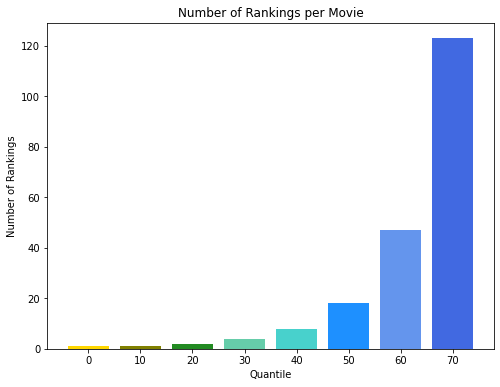

In [243]:
plt.figure()
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('Number of Rankings per Movie')
plt.xlabel('Quantile')
plt.ylabel('Number of Rankings')
plt.bar(x_quant[:-3], quantile_movies[:-3], color=quant_color)
plt.savefig("Zoom Num_Rankings_Per_Movie.png", bbox_inches='tight')

In [7]:
user_rating_counts.sum()

20000263

In [8]:
user_counts = pd.DataFrame(user_rating_counts)
user_counts.columns=['user_count']
user_counts = user_counts.reset_index()
user_counts = pd.DataFrame(user_counts['user_count'])
user_counts

,user_count
0,9254
1,7515
2,5646
3,5520
4,5491
...,...
138488,20
138489,20
138490,20
138491,20


In [9]:
quantile_users = [user_counts.quantile(0),
user_counts.quantile(0.1),
user_counts.quantile(0.2),
user_counts.quantile(0.3),
user_counts.quantile(0.4),
user_counts.quantile(0.5),
user_counts.quantile(0.6),
user_counts.quantile(0.7),
user_counts.quantile(0.8),
user_counts.quantile(0.9),
user_counts.quantile(1)]
quantile_users = [ x.tolist()[0] for x in quantile_users]

In [10]:
quantile_users

[20.0, 24.0, 30.0, 39.0, 51.0, 68.0, 93.0, 127.0, 193.0, 334.0, 9254.0]

In [11]:
len(list(range(0,110, 10)))

11

In [12]:
quant_color = ['gold', 'olive', 'forestgreen',
          'mediumaquamarine', 'mediumturquoise', 'dodgerblue','cornflowerblue', 'royalblue', 
          'mediumblue', 'darkblue', 'indigo']
len(quant_color)

11

In [13]:
x_quant = [str(x) for x in list(range(0,110,10))]

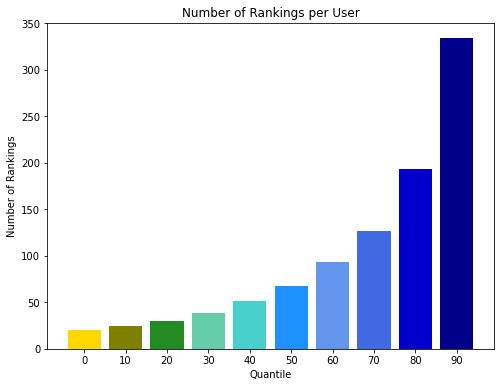

In [19]:
plt.figure()
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('Number of Rankings per User')
plt.xlabel('Quantile')
plt.ylabel('Number of Rankings')
plt.bar(x_quant[:-1], quantile_users[:-1], color=quant_color)
plt.savefig("Zoom Num_Rankings_Per_User.png", bbox_inches='tight')

In [175]:
rating_count_range = [0, 50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000, 10000]

In [176]:
rating_num_range = user_counts.groupby(pd.cut(user_counts['user_count'], rating_count_range)).count()
rating_num_range

,user_count
user_count,
"(0, 50]",54437
"(50, 100]",32187
"(100, 250]",31548
"(250, 500]",12880
"(500, 1000]",5557
"(1000, 2000]",1629
"(2000, 3000]",199
"(3000, 4000]",37
"(4000, 5000]",10


In [165]:
num_ratings = list(grouped_num_rating_counts.index)
num_ratings

[20,
 21,
 22,
 23,
 25,
 24,
 26,
 28,
 27,
 30,
 29,
 31,
 32,
 33,
 35,
 34,
 37,
 36,
 40,
 38,
 41,
 39,
 50,
 42,
 43,
 44,
 46,
 47,
 45,
 51,
 48,
 52,
 49,
 55,
 53,
 54,
 56,
 59,
 57,
 60,
 61,
 58,
 63,
 62,
 65,
 64,
 100,
 67,
 70,
 68,
 66,
 69,
 74,
 71,
 72,
 75,
 76,
 73,
 101,
 77,
 78,
 79,
 80,
 84,
 102,
 83,
 81,
 82,
 104,
 103,
 90,
 85,
 87,
 86,
 89,
 91,
 88,
 105,
 92,
 110,
 93,
 96,
 108,
 109,
 115,
 111,
 97,
 99,
 107,
 95,
 94,
 106,
 98,
 112,
 113,
 118,
 124,
 121,
 116,
 130,
 114,
 120,
 117,
 126,
 119,
 122,
 128,
 123,
 127,
 125,
 136,
 139,
 129,
 138,
 132,
 133,
 131,
 135,
 143,
 134,
 137,
 140,
 145,
 150,
 155,
 141,
 142,
 148,
 151,
 149,
 154,
 153,
 200,
 156,
 160,
 152,
 163,
 165,
 147,
 158,
 144,
 146,
 166,
 159,
 161,
 172,
 162,
 175,
 169,
 157,
 176,
 173,
 167,
 168,
 164,
 201,
 174,
 177,
 171,
 202,
 206,
 189,
 183,
 170,
 188,
 178,
 181,
 204,
 205,
 215,
 213,
 180,
 187,
 185,
 179,
 210,
 184,
 212,
 203,
 192,


In [30]:
user_mean_scores = user_group_df.mean()

In [34]:
user_mean_scores

,movieId,rating
userId,,
1,3428.537143,3.742857
2,2098.524590,4.000000
3,1698.331551,4.122995
4,394.964286,3.571429
5,574.484848,4.272727
...,...,...
138489,3262.657895,3.986842
138490,1648.311258,3.556291
138491,6498.000000,2.681818


In [40]:
user_mean_scores.rating.value_counts(bins=5)

(3.2, 4.1]      100110
(2.3, 3.2]       19531
(4.1, 5.0]       17713
(1.4, 2.3]        1023
(0.495, 1.4]       116
Name: rating, dtype: int64

In [41]:
ranges = [0, 1, 2, 3, 4, 5]
user_mean_scores.groupby(pd.cut(user_mean_scores.rating, ranges)).count()

,movieId,rating
rating,,
"(0, 1]",39,39
"(1, 2]",476,476
"(2, 3]",10216,10216
"(3, 4]",101935,101935
"(4, 5]",25827,25827


In [47]:
test = pd.DataFrame(user_mean_scores['rating'])
average_rating_by_users = test.groupby(pd.cut(test.rating, ranges)).count()

In [69]:
average_rating_by_users.columns=['rating_count']
average_rating_by_users.reset_index()
average_rating_values = average_rating_by_users.rating_count.tolist()

In [70]:
average_rating_values

[39, 476, 10216, 101935, 25827]

In [77]:
np.sum(average_rating_values)

138493

In [72]:
ranges

[0, 1, 2, 3, 4, 5]

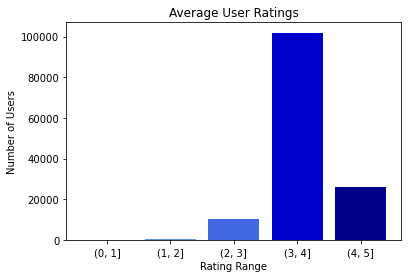

In [109]:
plt.figure()
plt.title('Average User Ratings')
plt.xlabel('Rating Range')
plt.ylabel('Number of Users')
plt.bar(['(0, 1]','(1, 2]','(2, 3]', '(3, 4]', '(4, 5]' ], average_rating_values, color=['dodgerblue','cornflowerblue', 'royalblue', 'mediumblue', 'darkblue'])
plt.savefig("Average User Ratings.png", bbox_inches='tight')

In [12]:
#20 million ratings and 465,000 tag applications applied to 27,000 movies by 138,000 users.
print(f"{pd.unique(ratings_df['movieId']).shape} vs {movie_df.shape}")

(26744,) vs (27278, 3)


In [22]:
ratings_df['movie_id'].max()

131262

In [13]:
len(ratings_df['movieId'].unique())

26744

In [14]:
movies = pd.DataFrame(ratings_df['movieId'], columns=['movieId'])
movies

,movieId
0,2
1,29
2,32
3,47
4,50
...,...
20000258,68954
20000259,69526
20000260,69644
20000261,70286


In [15]:
#20 million ratings and 465,000 tag applications applied to 27,000 movies by 138,000 users.
pd.unique(ratings_df['userId']).shape

(138493,)

In [16]:
users = pd.DataFrame(ratings_df['userId'], columns=['userId'])
users

,userId
0,1
1,1
2,1
3,1
4,1
...,...
20000258,138493
20000259,138493
20000260,138493
20000261,138493


In [17]:
users.shape

(20000263, 1)

In [18]:
users_ratings = (
    ratings_df
    .groupby('userId', as_index=False)
    .agg({'rating': ['count', 'mean']})
    .flatten_cols()
    .merge(users, on='userId')
)
users_ratings

,userId,rating count,rating mean
0,1,175,3.742857
1,1,175,3.742857
2,1,175,3.742857
3,1,175,3.742857
4,1,175,3.742857
...,...,...,...
20000258,138493,373,4.172922
20000259,138493,373,4.172922
20000260,138493,373,4.172922
20000261,138493,373,4.172922


In [19]:
def build_rating_sparse_tensor(ratings_df):
  """
  Args:
    ratings_df: a pd.DataFrame with `user_id`, `movie_id` and `rating` columns.
  Returns:
    a tf.SparseTensor representing the ratings matrix.
  """
  indices = ratings_df[['userId', 'movieId']].values
  vals = ratings_df['rating'].values
  return tf.SparseTensor(
      indices=indices,
      values=vals,
      dense_shape=[users.shape[0], movies.shape[0]]) 

In [20]:
#@title Alternate Solution
def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
  """
  Args:
    sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.reduce_sum(
      tf.gather(user_embeddings, sparse_ratings.indices[:, 0]) *
      tf.gather(movie_embeddings, sparse_ratings.indices[:, 1]),
      axis=1)
  loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
  return loss

In [21]:
# @title CFModel helper class (run this cell)
class CFModel(object):
  """Simple class that represents a collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None):
    """Initializes a CFModel.
    Args:
      embedding_vars: A dictionary of tf.Variables.
      loss: A float Tensor. The loss to optimize.
      metrics: optional list of dictionaries of Tensors. The metrics in each
        dictionary will be plotted in a separate figure during training.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    """The embeddings dictionary."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.
    Args:
      iterations: number of iterations to run.
      learning_rate: optimizer learning rate.
      plot_results: whether to plot the results at the end of training.
      optimizer: the optimizer to use. Default to GradientDescentOptimizer.
    Returns:
      The metrics dictionary evaluated at the last iteration.
    """
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()

      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

In [22]:
#@title Solution
def build_model(ratings, embedding_dim=3, init_stddev=1.):
  """
  Args:
    ratings: a DataFrame of the ratings
    embedding_dim: the dimension of the embedding vectors.
    init_stddev: float, the standard deviation of the random initial embeddings.
  Returns:
    model: a CFModel.
  """
  # Split the ratings DataFrame into train and test.
  train_ratings, test_ratings = split_dataframe(ratings)
  # SparseTensor representation of the train and test datasets.
  A_train = build_rating_sparse_tensor(train_ratings)
  A_test = build_rating_sparse_tensor(test_ratings)
    
  print('A_train shape', A_train.shape)
  print('A_test shape', A_test.shape)

  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
  
  train_loss = sparse_mean_square_error(A_train, U, V)
  test_loss = sparse_mean_square_error(A_test, U, V)
  metrics = {
      'train_error': train_loss,
      'test_error': test_loss
  }
  embeddings = {
      "userId": U,
      "movieId": V
  }
  return CFModel(embeddings, train_loss, [metrics])

In [23]:
# Utility to split the data into training and test sets.
def split_dataframe(df, holdout_fraction=0.1):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

In [ ]:
# Build the CF model and train it.
model = build_model(ratings_df, embedding_dim=30, init_stddev=0.5)
model.train(num_iterations=1000, learning_rate=10.)

A_train shape (20000263, 20000263)
A_test shape (20000263, 20000263)


In [12]:
rating_df.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [9]:
movie_df.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [21]:
len(pd.unique(df['userId']))

138493

In [5]:
title_counts = pd.DataFrame(df["title"].value_counts())

In [6]:
# # remove movies that appear less 3000 times
# popular_threashold = 2000
# popular_movies = df[~df["title"].isin(title_counts[title_counts["title"] <= popular_threashold].index)]

In [8]:
user_movie_table = movies_df.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_table.head()

NameError: name 'movies_df' is not defined

In [23]:
user_movie_table.shape

(138493, 2034)

In [7]:
random_user = int(pd.Series(user_movie_table.index).sample(1, random_state = 200).values)
print("The random user is " + str(random_user))
random_user_df = user_movie_table[user_movie_table.index == random_user]
random_user_movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()

NameError: name 'user_movie_table' is not defined

In [ ]:
movies_watched_df = user_movie_table[random_user_movies_watched]
movies_watched_df.head()

In [ ]:
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count.head(25)
user_movie_count = user_movie_count.reset_index() 
user_movie_count.columns = ["userId", "movie_count"]
users_same_movies = user_movie_count[user_movie_count["movie_count"] > 20]["userId"]
users_same_movies.index


final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[random_user_movies_watched]])
final_df.head()

In [ ]:
corr_table = final_df.T.corr(method ='kendall').unstack()
corr_table = corr_table.sort_values()
corr_table

In [ ]:
#calculate the similarities scores using .corr()

corr_df = pd.DataFrame(corr_table, columns=["corr"])
corr_df.head()
corr_df.index.names = ['target_user', 'predict_user']
corr_df = corr_df.reset_index()
corr_df.sort_values(by='corr',ascending=False).head(100)

In [ ]:
corr_threshold = 0.5
top_users = corr_df[(corr_df["target_user"] == random_user) & (corr_df["corr"] > corr_threshold)][
    ["predict_user", "corr"]].reset_index(drop=True)
top_users.head()
top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"predict_user": "userId"}, inplace=True)
top_users.head()

In [ ]:
# calcuating weighted_rating use the similarity score
top_users_ratings = top_users.merge(rating_df[["userId", "movieId", "rating"]], how='inner')
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.head(100)

In [ ]:
random_movieIds = top_users_ratings['movieId'].sample(10).values

In [ ]:
random_movieIds

In [ ]:
target_ratings, predicted_movie_ratings = [], []

for i in random_movieIds:
  # append results
  current = top_users_ratings.loc[top_users_ratings["movieId"].isin(random_movieIds)]
  target_ratings.append(current['rating'])
  predicted_movie_ratings.append(current['weighted_rating'])

In [ ]:
# compute MSE
from sklearn.metrics import mean_squared_error
mse_batch = mean_squared_error(np.array(target_ratings), np.array(predicted_movie_ratings))

print(mse_batch)

In [ ]:
# compute RMSE
rmse_batch = mean_squared_error(np.array(target_ratings), np.array(predicted_movie_ratings), squared=False)

print(rmse_batch)

# Overall MSE

In [ ]:
# Calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(top_users_ratings['rating'], top_users_ratings['weighted_rating'])

In [ ]:
print(mse)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(top_users_ratings['rating'], top_users_ratings['weighted_rating'], squared=False)

In [ ]:
print(rmse)